Imports and Paths

In [15]:
import kagglehub, pathlib, pandas as pd

path = pathlib.Path(kagglehub.dataset_download("martinellis/nhl-game-data"))
print("Path to dataset files:", path)


# See what files are available
list(path.glob("*.csv"))


Path to dataset files: C:\Users\puppy\.cache\kagglehub\datasets\martinellis\nhl-game-data\versions\2


[WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_goalie_stats.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_goals.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_officials.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_penalties.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_plays.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_plays_players.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_scratches.csv'),
 WindowsPath('C:/Users/puppy/.cache/kagglehub/datasets/martinellis/nhl-game-data/versions/2/game_sh

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv(path / "game.csv", low_memory=False)
team_stats = pd.read_csv(path / "game_teams_stats.csv", low_memory=False)  # <-- fix here
teams = pd.read_csv(path / "team_info.csv", low_memory=False)

games.shape, team_stats.shape, teams.shape


((26305, 15), (52610, 17), (33, 6))

Column Check

In [17]:
team_stats.columns.tolist()


['game_id',
 'team_id',
 'HoA',
 'won',
 'settled_in',
 'head_coach',
 'goals',
 'shots',
 'hits',
 'pim',
 'powerPlayOpportunities',
 'powerPlayGoals',
 'faceOffWinPercentage',
 'giveaways',
 'takeaways',
 'blocked',
 'startRinkSide']

Preprocess

In [18]:
df = team_stats.copy()

# outcome -> boolean
df["won"] = df["won"].astype(str).str.lower().isin(["true","1","yes","y"])

# home/away flag
df["home"] = (df["HoA"].astype(str).str.upper() == "HOME").astype(int)

# add season
if "game_id" in df.columns and "season" in games.columns:
    df = df.merge(games[["game_id","season"]], on="game_id", how="left")

# simple NA handling for numerics
for c in df.select_dtypes("number"):
    df[c] = df[c].fillna(df[c].median())

df.head(3)


,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,home,season
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,0,20162017
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,1,20162017
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,0,20172018


Starter Charts

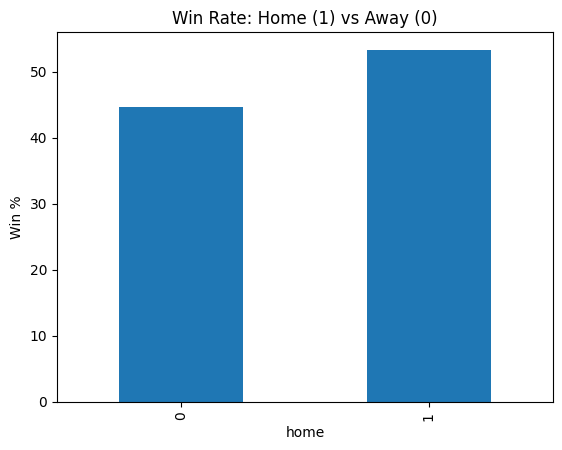

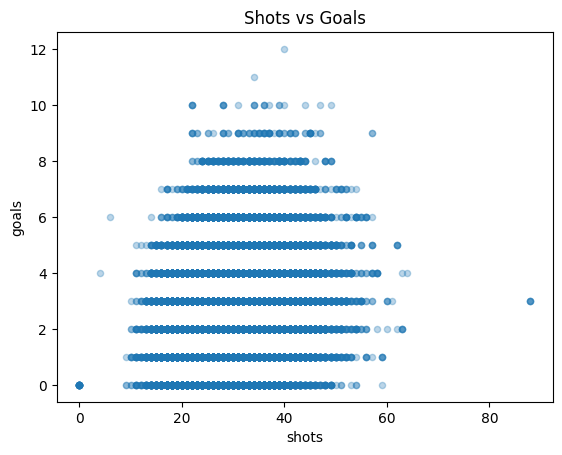

C:\Users\puppy\AppData\Local\Temp\ipykernel_27800\3770277128.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("pim_bin")["won"].mean().mul(100)).plot(kind="bar")


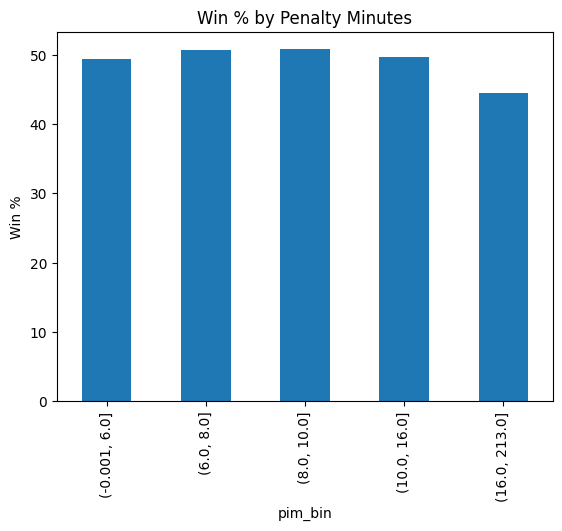

In [19]:
import matplotlib.pyplot as plt
# Home vs Away win %
(df.groupby("home")["won"].mean().mul(100)).plot(kind="bar")
plt.title("Win Rate: Home (1) vs Away (0)")
plt.ylabel("Win %"); plt.show()

# Shots vs Goals
if {"shots","goals"}.issubset(df.columns):
    df.plot(kind="scatter", x="shots", y="goals", alpha=0.3)
    plt.title("Shots vs Goals"); plt.show()

# Win % by Penalty Minutes (quintiles)
if {"pim","won"}.issubset(df.columns):
    (df.assign(pim_bin=pd.qcut(df["pim"], 5, duplicates="drop"))
       .groupby("pim_bin")["won"].mean().mul(100)).plot(kind="bar")
    plt.title("Win % by Penalty Minutes"); plt.ylabel("Win %"); plt.show()


load game data

In [20]:
import pandas as pd

games = pd.read_csv(path / "game.csv", low_memory=False)
team_stats = pd.read_csv(path / "game_teams_stats.csv", low_memory=False)
teams = pd.read_csv(path / "team_info.csv", low_memory=False)

games.shape, team_stats.shape, teams.shape


((26305, 15), (52610, 17), (33, 6))

preprocess

In [21]:
df = team_stats.copy()

# Normalize "won" column to True/False
if "won" in df.columns:
    df["won"] = df["won"].astype(str).str.lower().isin(["true","1","yes","y"])

# Convert Home/Away to numeric flag
if "HoA" in df.columns:
    df["home"] = (df["HoA"].astype(str).str.upper() == "HOME").astype(int)

# Merge season info
if "game_id" in df.columns and "season" in games.columns:
    df = df.merge(games[["game_id","season"]], on="game_id", how="left")

# Fill numeric missing values with medians
for c in df.select_dtypes("number"):
    df[c] = df[c].fillna(df[c].median())

df.head(3)


,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,home,season
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,0,20162017
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,1,20162017
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,0,20172018


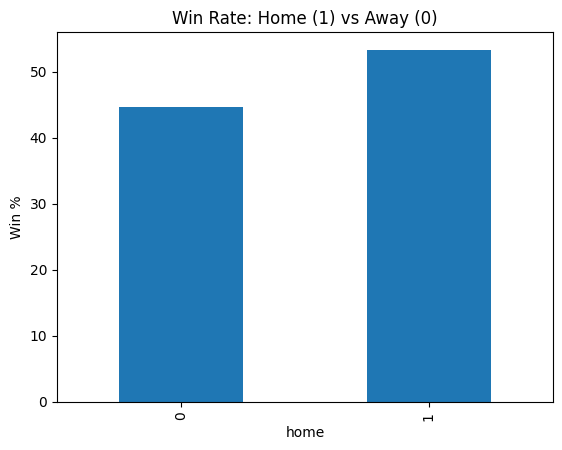

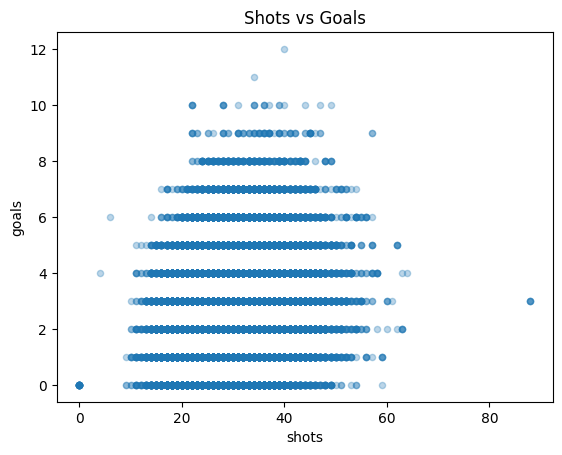

C:\Users\puppy\AppData\Local\Temp\ipykernel_27800\1928583970.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("pim_bin")["won"].mean().mul(100)).plot(kind="bar")


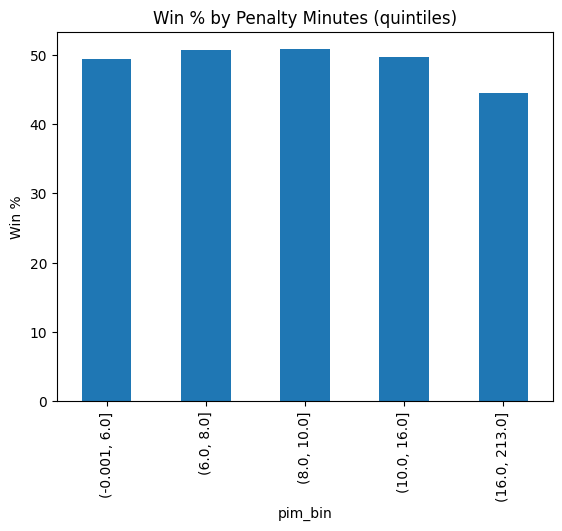

In [22]:
import matplotlib.pyplot as plt

# Home vs Away win %
if {"home","won"}.issubset(df.columns):
    (df.groupby("home")["won"].mean().mul(100)).plot(kind="bar")
    plt.title("Win Rate: Home (1) vs Away (0)")
    plt.ylabel("Win %")
    plt.show()

# Shots vs Goals
if {"shots","goals"}.issubset(df.columns):
    df.plot(kind="scatter", x="shots", y="goals", alpha=0.3)
    plt.title("Shots vs Goals")
    plt.show()

# Win % by Penalty Minutes
if {"pim","won"}.issubset(df.columns):
    (df.assign(pim_bin=pd.qcut(df["pim"], 5, duplicates="drop"))
       .groupby("pim_bin")["won"].mean().mul(100)).plot(kind="bar")
    plt.title("Win % by Penalty Minutes (quintiles)")
    plt.ylabel("Win %")
    plt.show()


Markdown Outline

# Project 1 — NHL Game Data

## 1. Problem / Questions
- Does home-ice advantage matter?
- Do more penalty minutes reduce win %?
- (Optional: How do shots, PP goals, or faceoffs relate to outcomes?)

## 2. Data Introduction
- Dataset: [NHL Game Data on Kaggle](https://www.kaggle.com/datasets/martinellis/nhl-game-data)
- Files: game.csv, game_teams_stats.csv, team_info.csv
- Key features: game_id, team_id, HoA, won, goals, shots, pim, powerPlayGoals, faceOffWinPercentage, season

## 3. Preprocessing
- Normalize boolean columns (won)
- Convert HoA to numeric
- Merge season data
- Handle missing values

## 4. Exploration & Visualizations
- Home vs Away win %
- Shots vs Goals scatter
- Win % by Penalty Minutes

## 5. Storytelling / Findings
- Summarize results, connect them back to your questions

## 6. Impact / Limitations
- Correlation vs causation
- Data coverage (seasons included)
- Missing features (goalie performance, strength of schedule, etc.)

## 7. References
- [Kaggle dataset link](https://www.kaggle.com/datasets/martinellis/nhl-game-data)


In [24]:
df.describe()

,game_id,team_id,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,home,season
count,6.289000e+04,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,62890.000000,6.289000e+04
mean,2.012028e+09,17.251741,2.811814,30.169900,21.433153,11.213547,3.575115,0.654492,49.984106,9.101161,6.812768,13.439434,0.500000,2.012208e+07
std,6.250068e+06,11.770953,1.668041,6.909852,8.844509,8.714441,1.827873,0.804326,5.880169,5.239990,3.959832,5.275407,0.500004,6.250359e+04
min,2.000020e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000200e+07
25%,2.007020e+09,8.000000,2.000000,25.000000,16.000000,6.000000,2.000000,0.000000,47.900000,5.000000,4.000000,10.000000,0.000000,2.007201e+07
50%,2.013021e+09,16.000000,3.000000,30.000000,21.000000,9.000000,3.000000,0.000000,50.000000,9.000000,6.000000,13.000000,0.500000,2.013201e+07
75%,2.018021e+09,24.000000,4.000000,35.000000,26.000000,14.000000,5.000000,1.000000,52.100000,12.000000,9.000000,16.000000,1.000000,2.018202e+07
max,2.019041e+09,90.000000,12.000000,88.000000,80.000000,213.000000,16.000000,7.000000,79.200000,52.000000,40.000000,62.000000,1.000000,2.019202e+07
